<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
urllib.request.urlretrieve(url, 'm4_survey_data.sqlite')


('m4_survey_data.sqlite', <http.client.HTTPMessage at 0x162008acf70>)

Connect to the database.


In [11]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Demo: How to run an sql query


In [14]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [15]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [16]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [17]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<Axes: title={'center': 'ConvertedComp'}>]], dtype=object)

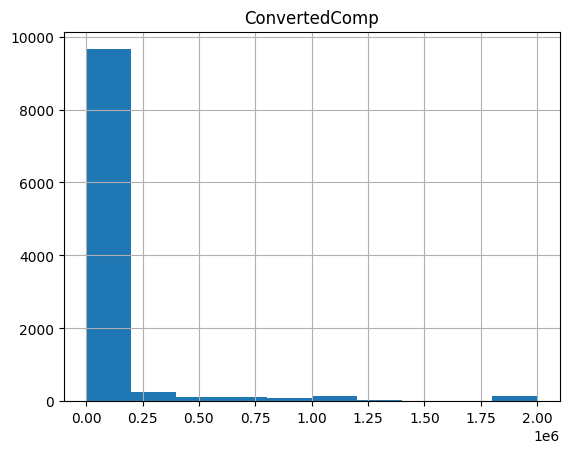

In [18]:
# your code goes here
query =""" select ConvertedComp from  master """
df =pd.read_sql_query(query,conn)
df.hist()


### Box Plots


Plot a box plot of `Age.`


<Axes: >

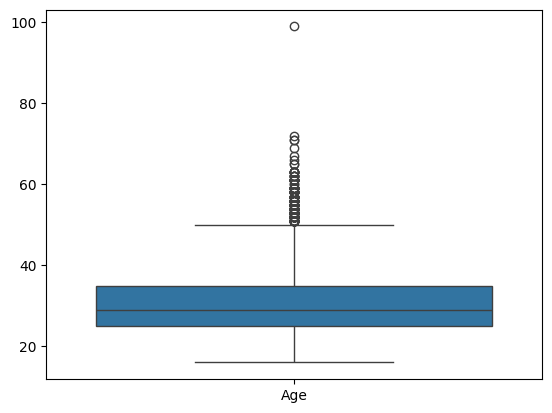

In [19]:
# your code goes here
query =""" select Age from  master """
df =pd.read_sql_query(query,conn)
sns.boxplot(df)


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: xlabel='WorkWeekHrs', ylabel='Age'>

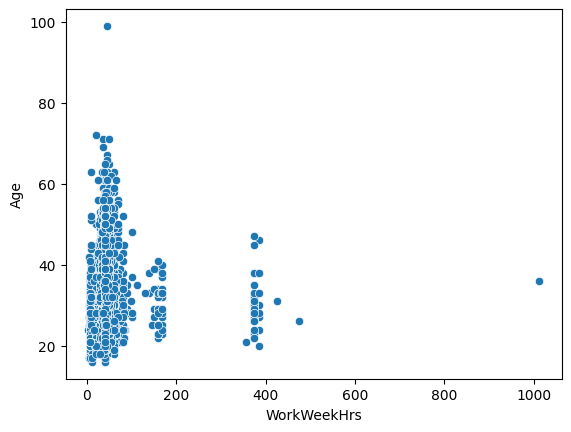

In [22]:
# your code goes here
query =""" select Age,WorkWeekHrs from  master """
df =pd.read_sql_query(query,conn)
sns.scatterplot(x=df["WorkWeekHrs"] , y=df["Age"])


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


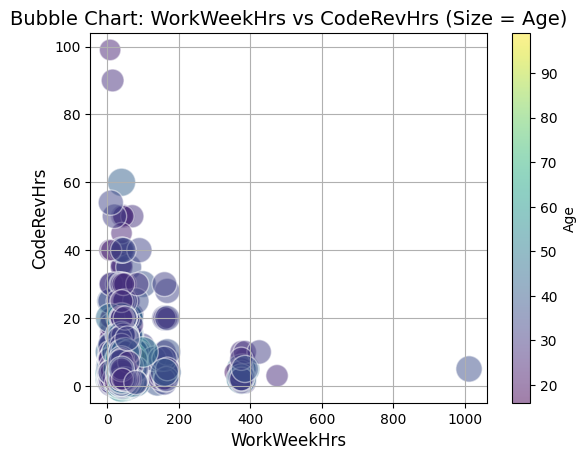

In [25]:
# your code goes here
query =""" select WorkWeekHrs,CodeRevHrs,Age from  master """
df =pd.read_sql_query(query,conn)
plt.scatter(
    df['WorkWeekHrs'], df['CodeRevHrs'], 
    s=df['Age']*10,  # Multiply by 10 to make the bubbles bigger
    alpha=0.5,       # Transparency of bubbles
    c=df['Age'],     # Color by Age
    cmap='viridis',  # Colormap
    edgecolors='w',  # Bubble border color
    linewidth=1      # Bubble border width
)
plt.title('Bubble Chart: WorkWeekHrs vs CodeRevHrs (Size = Age)', fontsize=14)
plt.xlabel('WorkWeekHrs', fontsize=12)
plt.ylabel('CodeRevHrs', fontsize=12)

# Show the plot
plt.colorbar(label='Age')  # Adding a color bar to show the scale for Age
plt.grid(True)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


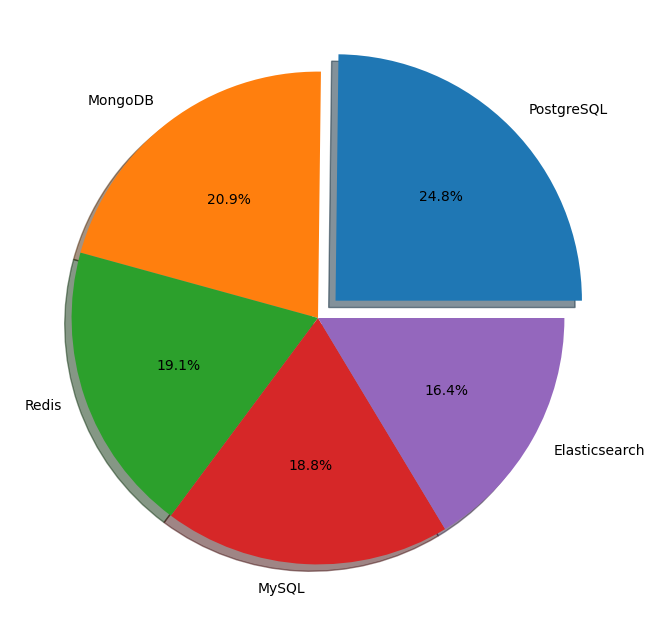

In [26]:
# your code goes here
QUERY = """
SELECT *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

data = df['count']
labels = df['DatabaseDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
plt.show()


   Respondent LanguageDesireNextYear  count
0           4             JavaScript   6630
1           9               HTML/CSS   5328
2          20                 Python   5239
3           4                    SQL   5012
4           9             TypeScript   4088


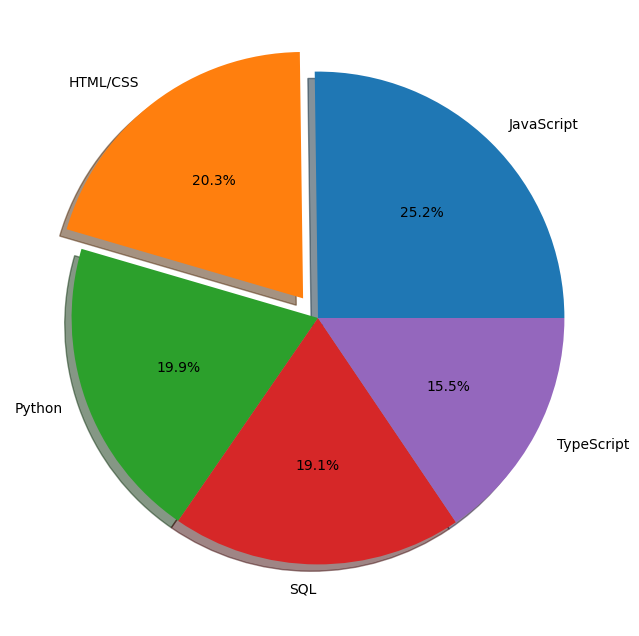

In [27]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['count']
labels = df['LanguageDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0, 0.1, 0, 0, 0), shadow = True)
plt.show()

   Respondent     LanguageWorkedWith  count
0           9             JavaScript   8687
1           9               HTML/CSS   7830
2           4                    SQL   7106
3           9  Bash/Shell/PowerShell   4642
4           4                 Python   4542


([<matplotlib.patches.Wedge at 0x162099b3820>,
 [Text(0.740847699094287, 0.8131080412507926, 'JavaScript'),
  Text(-0.8957584531953705, 0.7985091067289322, 'HTML/CSS'),
  Text(-0.8397605588448667, -0.7104943376330014, 'SQL'),
  Text(0.27895660244678183, -1.064040983210397, 'Bash/Shell/PowerShell'),
  Text(0.9975843323029219, -0.4634927183287067, 'Python')],
 [Text(0.4040987449605202, 0.44351347704588684, '26.5%'),
  Text(-0.5225257643639661, 0.46579697892521044, '23.9%'),
  Text(-0.4580512139153818, -0.3875423659816371, '21.7%'),
  Text(0.1521581467891537, -0.5803859908420347, '14.1%'),
  Text(0.5441369085288664, -0.25281420999747634, '13.8%')])

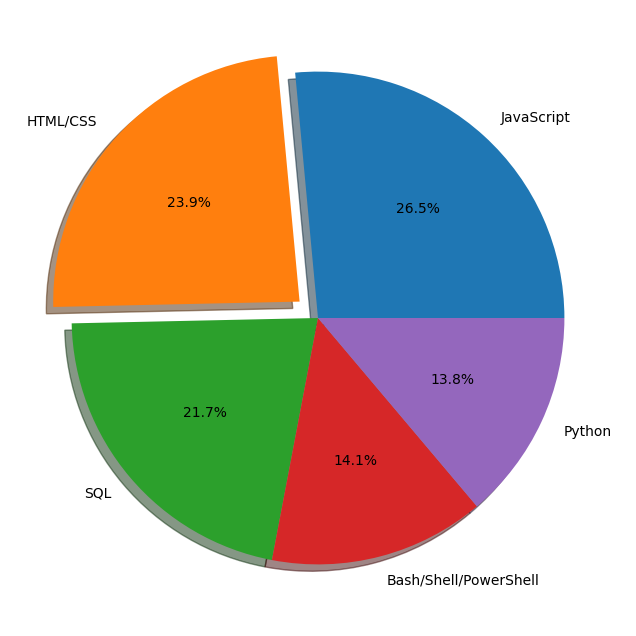

In [28]:
# your code goes here

QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['count']
labels = df['LanguageWorkedWith']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0, 0.1, 0, 0, 0), shadow = True)

In [32]:
QUERY = """
SELECT * 
FROM DatabaseWorkedWith
ORDER BY Respondent
"""
df = pd.read_sql_query(QUERY,conn)

# Initialize the 'uniques' list to store respondents who worked with exactly one database
uniques = []

# Step 1: Count the number of databases each respondent has worked with
counts = df.groupby('Respondent').count() # Counts the number of times each Respondent appears

# Step 2: Identify respondents who worked with only one database
for i in range(len(counts)):
    if counts.iloc[i, 0] == 1:  # Assuming the first column of counts represents the number of databases
        uniques.append(counts.index[i])

# Step 3: Count how many of these respondents worked with MySQL only
uniq_mysql = 0

for j in range(len(df)):
    if df['Respondent'][j] in uniques:
        if df['DatabaseWorkedWith'][j] == 'MySQL':
            uniq_mysql += 1

uniq_mysql


474

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


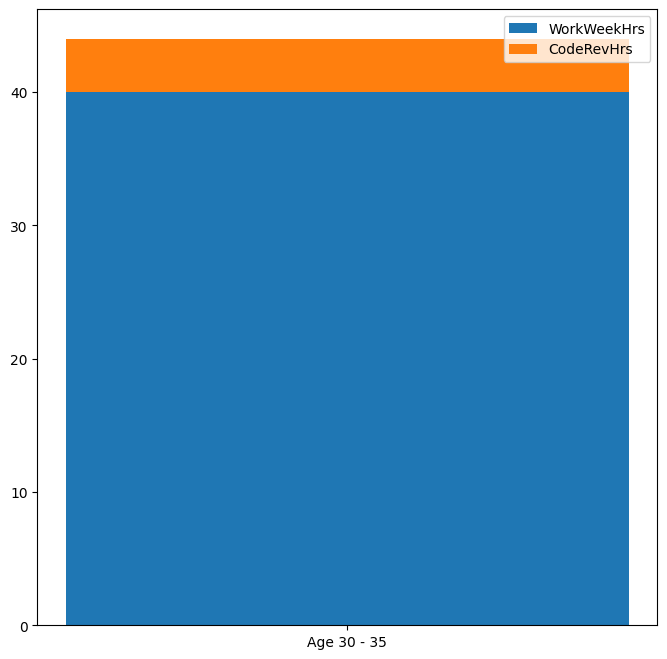

In [33]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35

"""
df = pd.read_sql_query(QUERY,conn)

work_week = df['WorkWeekHrs'].quantile(0.5)
code_rev = df['CodeRevHrs'].quantile(0.5)


plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()

plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


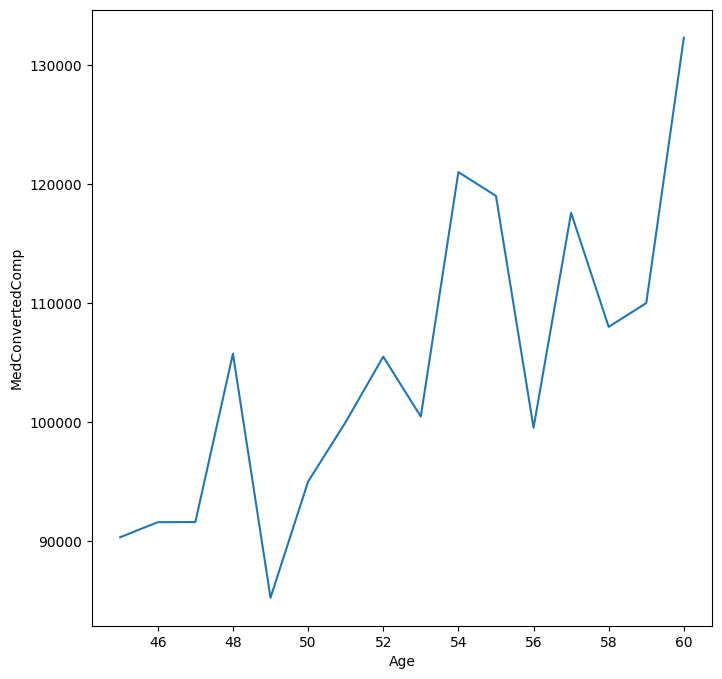

In [34]:
# your code goes here

QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60

"""
df = pd.read_sql_query(QUERY,conn)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


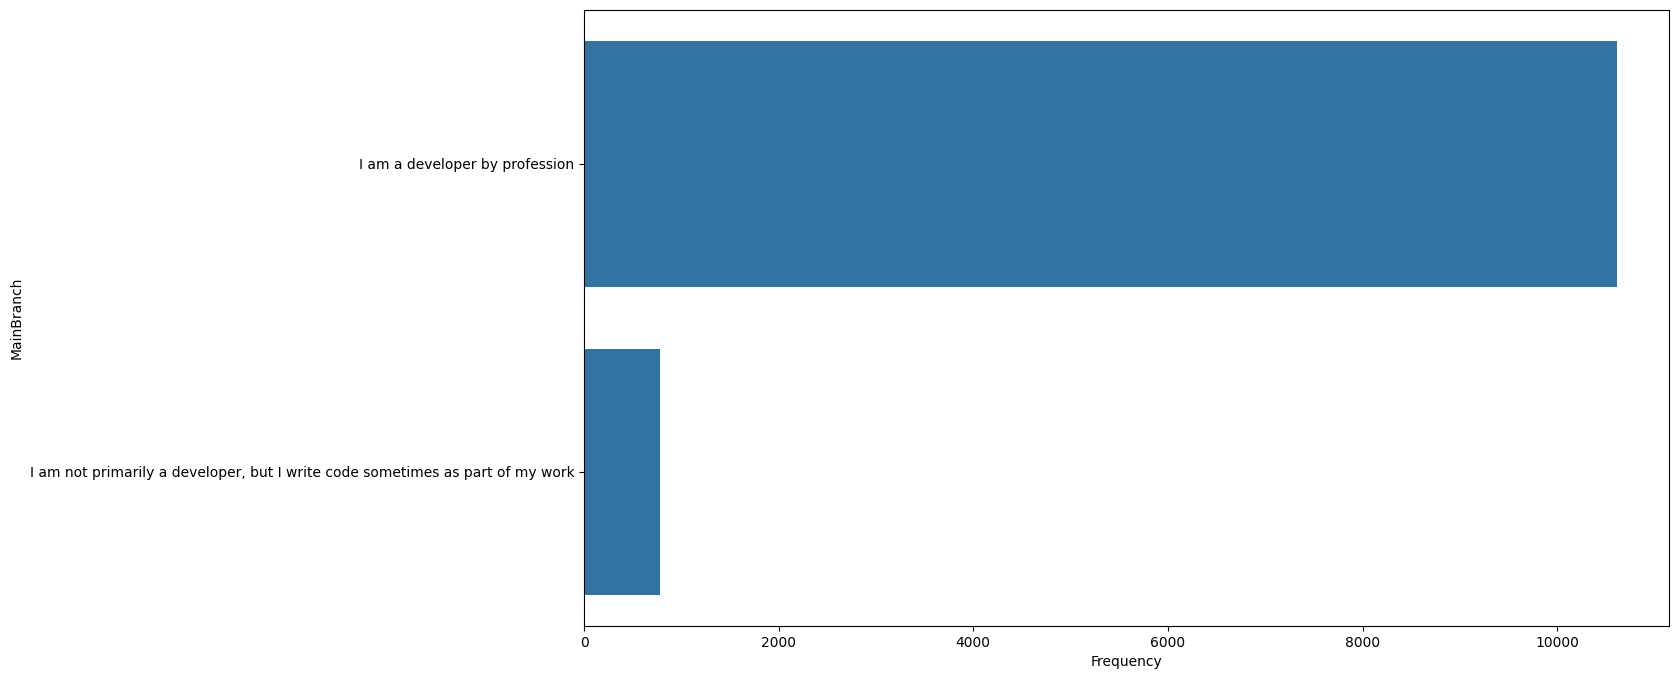

In [35]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY MainBranch

"""
df = pd.read_sql_query(QUERY,conn)

plt.rcParams['figure.figsize'] = [14, 8]

sns.barplot(data = df, y = 'MainBranch', x = 'Frequency', orient = 'h')

plt.show()


Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp?

<Axes: xlabel='Age', ylabel='MedConvertedComp'>

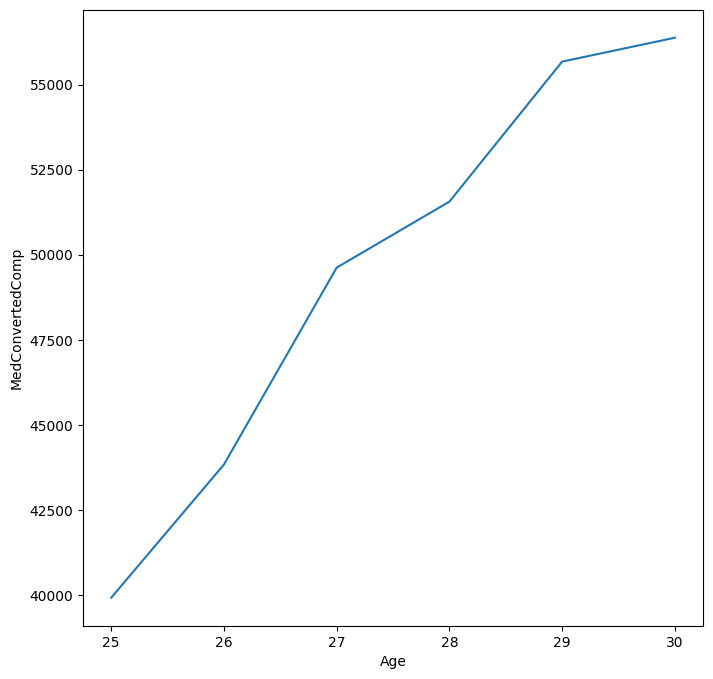

In [37]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30

"""
df = pd.read_sql_query(QUERY,conn)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
